### О задании
Результат работы − отчет в формате ноутбуков IPython (ipynb-файл). Код пишется на Python3. Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: мне − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.    
Выполнение лабораторных работ занимает значительное время, поэтому не рекомендуем оставлять их на последний вечер перед сдачей.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) получают за всю лабораторную работу 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо в комментариях к коду указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

**Важно!!!** Прочитайте [руководство по написанию кода](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Работы, где будут грубо нарушены принципы оформления кода, будут штрафоваться!    
Также помните, что самая главная ошибка, которую надо избегать, - дублирование кода.

### Правила сдачи
Выполненную работу следует отправить на почту `nikmort@ya.ru` с указанием темы `[FBB hw <номер домашнего задани> Surname Name]`, например `FBB hw 2 Ivanov Petr`. Название отправляемого файла должно иметь следующий формат: `N_Surname_Name.ipynb`, где `N` — номер домашнего задания. Например, `2_Ivanov_Petr.ipynb`.

In [1]:
from random import sample
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import make_classification, make_blobs, make_circles, make_moons, load_digits
from sklearn.utils import shuffle as sklearn_shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn.cluster as cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

# SVM 

Для начала опробуем еще один изученный классификатор - SVM. Приницип работы этого классификатора состоит в построении гиперплоскости, разделяющей объекты в некотором пространстве.

Для начала посмотрим на работу классификатора на некоторых искусственных примерах. Ниже сгененировано несколько искусственных разделимых выборок: линейно разделимая, нелинейно разделимая и неразделимая. Вы также можете добавить еще выборок.

In [2]:
X, y = {}, {}
X['blobs'], y['blobs'] = make_blobs(n_samples=400, n_features=2, centers=2, random_state=10, cluster_std=2.2)
X['circles'], y['circles'] = make_circles(n_samples=400, random_state=1, factor=0.2, noise=0.1)
X['moons'], y['moons'] = make_moons(n_samples=400, noise=0.07, random_state=1)
X['mix'], y['mix'] = make_classification(
    n_samples=400, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4
)

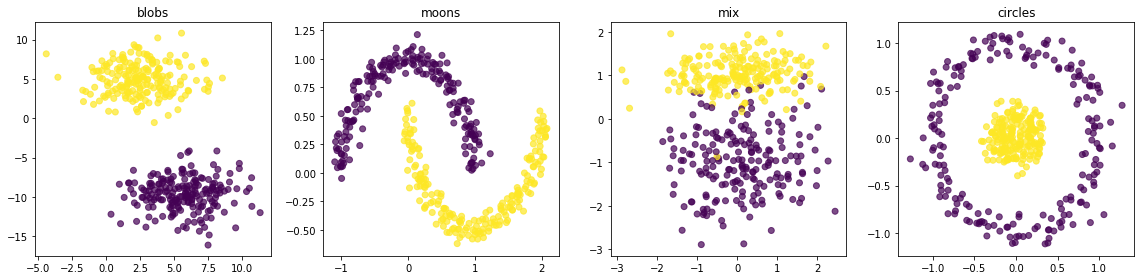

In [3]:
f, axarr = plt.subplots(1, len(X), figsize=(16, 4))
for case, ax in zip(X.keys(), axarr):
    y[case] = np.round(2 * (y[case] - 0.5))
    ax.scatter(X[case][:, 0], X[case][:, 1], c=y[case], alpha=0.7)
    ax.set_title(case);
f.tight_layout()

**(3 балла)** Протестируйте **линейный** SVM  на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Сделайте рисунки для разных значений параметра $C$.

Рекомендуется сделать рисунок с помощью `plt.subplots`: строки будут соответствовать разным значениям $C$, столбцы - разным выборкам.

Рекомендуется начать перебор $C$ с логарифмической сетки: от 0.01 до 100. Если вам покажется, что на такой сетке сложно сделать выводы, рассмотрите другую.

Что меняется в зависимости от значений $C$? Для каждой из выборок нарисуйте график зависимости числа опорных векторов от параметра $C$.

Для выполнения этого задания стоит вспомнить, что в обученном SVM есть атрибуты `support_vectors_`, `coef_`, `intercept_`.

In [4]:
#часть кода позаимствована отсюда: 
#http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py

def get_plots_w_margins(classifiers, X):
    f, axarr = plt.subplots(len(classifiers), len(X), figsize=(16, 16))
    colors = ["yellow", "blue"]
    for clf, axr in zip(classifiers, axarr):
        for case, ax in zip(X.keys(), axr):
            clf.fit(X[case], y[case]) 
            y_pred = clf.predict(X[case])
            ax.scatter(X[case][:, 0], X[case][:, 1], c=y_pred, cmap="bwr")
            ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
            w = clf.coef_[0]
            a = -w[0] / w[1]
            xx = np.array(ax.get_xlim())
            yy = a * xx - (clf.intercept_[0]) / w[1]
            margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
            yy_down = yy - np.sqrt(1 + a ** 2) * margin
            yy_up = yy + np.sqrt(1 + a ** 2) * margin
            ax.plot(xx, yy, color="black")
            ax.plot(xx, yy_down, 'k--')
            ax.plot(xx, yy_up, 'k--')

In [5]:
def get_plots_w_vectors(classifiers, params, X):
    f, axarr = plt.subplots(1, len(X), figsize=(16, 4))
    for case, ax in zip(X.keys(), axarr):
        n_vecs = []
        for clf in classifiers:
            clf.fit(X[case], y[case]) 
            n_vecs.append(len(clf.support_vectors_))
        ax.plot(np.log10(params), n_vecs, color="black") 
        ax.set_title(case)

In [6]:
C = np.array([0.001, 0.01, 0.1, 1, 10, 100])
classifiers = [SVC(kernel='linear', C=c, random_state=32) for c in C]

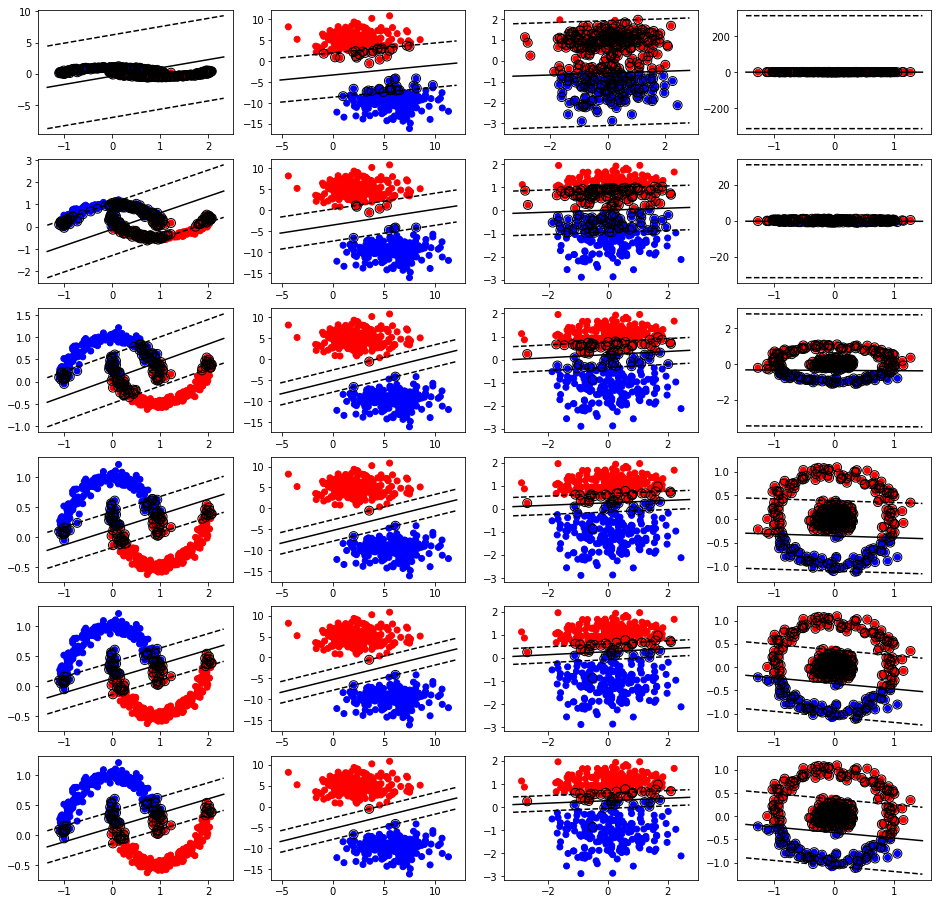

In [22]:
get_plots_w_margins(classifiers, X)

Чем ниже график, тем больше значение гиперпараметра С. 

Видно сужение разделяющей полосы с увеличением регуляризующего гиперпараметра. Также уменьшается количество опорных векторов.

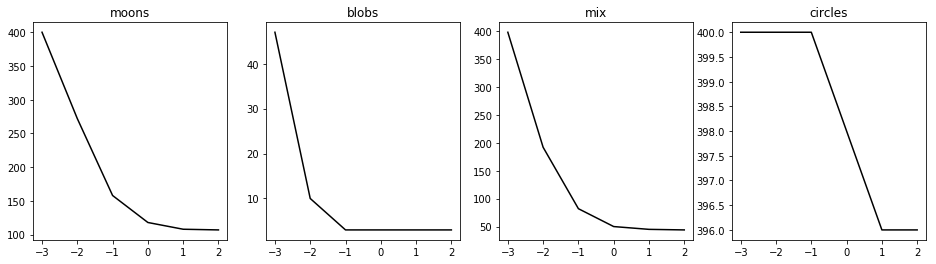

In [25]:
get_plots_w_vectors(classifiers, C, X)  

Ось абсцисс - логарифмическая. Видно сильное падение числа опорных векторов с увеличением параметра С.

**(2 балла)** Протестируйте полиномиальные (со степенями 2 и 3) SVM и SVM с гауссовским ядром на сгенерированных выборках. Покажите на плоскости разделяющую прямую и линии уровня, ограничивающие коридор $f(\boldsymbol x) = \pm 1$. Выделите опорные вектора точками другой формы или большего размера. Сделайте рисунки для разных значений параметра $C$.

Как влияет выбор ядра на работу SVM? На каких выборках наблюдается эффект? Как бы вы его объяснили?

In [7]:
classifiers_poly2 = [SVC(kernel='poly', degree=2, C=c, random_state=32) for c in C]
classifiers_poly3 = [SVC(kernel='poly', C=c, random_state=32) for c in C]
classifiers_rbf = [SVC(kernel='rbf', C=c, random_state=32) for c in C]

AttributeError: coef_ is only available when using a linear kernel

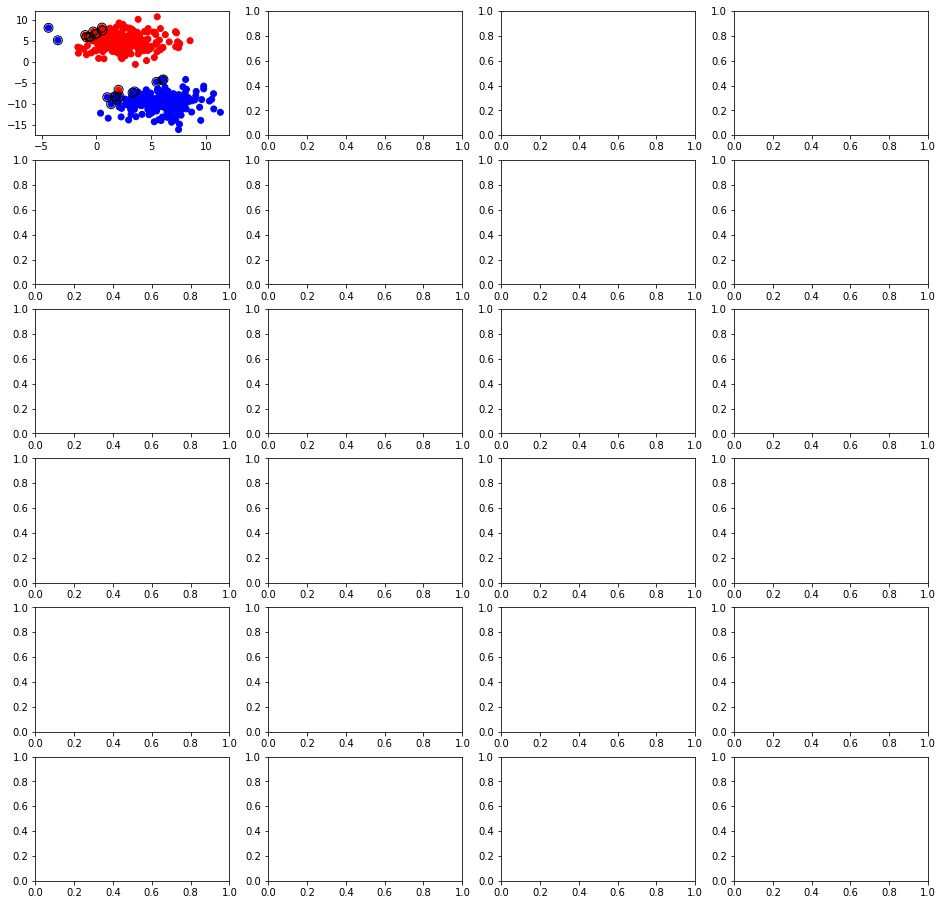

In [8]:
get_plots_w_margins(classifiers_poly2, X)

:(

**(2 балла)**. Выберите наиболее удачную конфигурацию SVM (ядро и значение $C$) и протестируйте поведение вашего SVM на тех же выборках в зависимости от параметра `gamma` (подберите сетку, которая обеспечивала бы наибольшую наглядность). Что меняется при варьировании этого параметра?

:(

**(4 балла)** Давайте сравним этот классификатор с теми, что мы использовали в предыдущей домашней работе. Загрузите набор данных *data.adult.csv*, удалите объекты с пропущенными значениями. Оставьте только вещественные признаки. Нормируйте признаки.

Сравните классификаторы, выбрав их параметры по сетке (если вы делали это в прошлой работе, можете взять значения оттуда):

 - KNN — *n_neighbors* и *metric*
 - DecisonTree — *max_depth* и *max_features*,
 - RandomForest — *max_depth* и *max_features* (число деревьев можете взять из предыдущей работы),
 - SVC - *C* и *gamma* (ядро - по умолчанию).
 
*В качестве метрики качества используйте ROC-AUC.*

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой.

Какой из алгоритмов имеет наилучшее качество? Как различаются их время работы и обучения? Имеет ли какие-нибудь преимущества SVC? Постройте сравнительную табличку для данных классификаторов.

In [25]:
adult_data = pd.read_csv('data.adult.csv')
adult_data.drop(adult_data[adult_data['occupation']=='?'].index, inplace=True)
adult_data.index = list(range(len(adult_data)))
from sklearn.utils import shuffle

def get_conts(df):                  
    conts = []
    for x in df.columns:
        if 'int' == df[x].dtype or 'float' == df[x].dtype:
            conts.append(x)
    return conts    


adult_data = shuffle(adult_data, random_state=38)   

d = {'<=50K' : -1, '>50K' : 1}
adult_data['>50K,<=50K'] = adult_data['>50K,<=50K'].map(d)
y = adult_data['>50K,<=50K']
adult_data.drop('>50K,<=50K', axis=1, inplace=True)      

adult_data = adult_data[get_conts(adult_data)]

scaler = MinMaxScaler(copy=False)
adult_data = pd.DataFrame(scaler.fit_transform(adult_data), index=adult_data.index, columns=adult_data.columns)
adult_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
9241,0.136986,0.045980,0.800000,0.0,0.000000,0.397959
1473,0.493151,0.091568,0.333333,0.0,0.000000,0.397959
2077,0.301370,0.282006,0.533333,0.0,0.417436,0.397959
2690,0.342466,0.100050,0.800000,0.0,0.000000,0.448980
12337,0.232877,0.250489,0.600000,0.0,0.000000,0.500000


In [27]:
model_knn = KNeighborsClassifier(n_jobs=4)
model_dt = DecisionTreeClassifier(random_state=38)
model_rf = RandomForestClassifier(n_estimators=197, n_jobs=4, random_state=38) #число деревьев из прошлой домашки
model_svm = SVC(random_state=38)


kf5 = KFold(n_splits=5, shuffle=True, random_state=38)


params_svm = {'C': [0.001, 0.01, 0.1, 1, 10],
             'gamma': [0.05, 0.5, 5, 50, 500]}
params_knn = {'n_neighbors': range(1,70), 
            'metric': ["euclidean", "manhattan", "chebyshev", "minkowski"]}
params_dt = {'max_depth': range(3, 31),
            'max_features': np.arange(0.5, 1, 0.5)}
params_rf = {'max_depth': np.arange(3, 26),
            'max_features': np.arange(0.5, 1, 0.5)}

grid_svm = GridSearchCV(model_svm, params_svm, cv=kf5, n_jobs=4, scoring='roc_auc')
grid_svm.fit(adult_data, y)

print('The best hyperparameters for SVM: ', grid_svm.best_params_, '.', 
      ' ROC-AUC: ', grid_svm.best_score_, sep='')

grid_rf = GridSearchCV(model_rf, params_rf, cv=kf5, scoring='roc_auc')
grid_rf.fit(adult_data, y)

print('The best hyperparameters for RF: ', grid_rf.best_params_, '.', 
      ' ROC-AUC: ', grid_rf.best_score_, sep='')

grid_dt = GridSearchCV(model_dt, params_dt, cv=kf5, n_jobs=4, scoring='roc_auc')
grid_dt.fit(adult_data, y)

print('The best hyperparameters for DT: ', grid_dt.best_params_, '.', 
      ' ROC-AUC: ', grid_dt.best_score_, sep='')

grid_knn = GridSearchCV(model_knn, params_knn, cv=kf5, scoring='roc_auc')
grid_knn.fit(adult_data, y)

print('The best hyperparameters for kNN: ', grid_knn.best_params_, '.', 
      ' ROC-AUC: ', grid_knn.best_score_, sep='')

The best hyperparameters for SVM: {'C': 1, 'gamma': 0.5}. ROC-AUC: 0.83305520367
The best hyperparameters for RF: {'max_features': 0.5, 'max_depth': 9}. ROC-AUC: 0.854435114303
The best hyperparameters for DT: {'max_features': 0.5, 'max_depth': 8}. ROC-AUC: 0.836677100814
The best hyperparameters for kNN: {'metric': 'manhattan', 'n_neighbors': 57}. ROC-AUC: 0.8288193595


In [47]:
pivot = pd.DataFrame()

for name, grid_model in zip(['Desicion Tree', 'k-Nearest Neighbors', 'Random Forest', 'Support Vector Machine'], 
                            [grid_dt, grid_knn, grid_rf, grid_svm]):
    pivot = pd.concat([pivot, pd.Series(data=[grid_model.best_score_, 
                                              grid_model.cv_results_['mean_fit_time'].mean(),
                                              grid_model.cv_results_['mean_score_time'].mean()], 
                                        index=['Best Score', 'Mean fit time', 'Mean score time'], 
                                        name=name)],
                       axis=1)
pivot

,Desicion Tree,k-Nearest Neighbors,Random Forest,Support Vector Machine
Best Score,0.836677,0.828819,0.854435,0.833055
Mean fit time,0.015806,0.047844,0.681708,5.290067
Mean score time,0.001680,0.198476,0.151120,0.569536


## Рассуждения 
На данном датасете точность SVM'a находится примерно на уровне решающего дерева, однако у него гораздо более долгое время обучения. Самой точной моделью является случайный лес, который, помимо этого, эффективно параллелится, не нуждается в шкалировании данных и который трудно переобучить. Одним из преимуществ SVM'а является его устойчивость к шуму. 

# Мультиклассовая классификация

(**4 балла**) До этого момента мы все время решали задачи бинарной классификации. Давайте посмотрим, что можно делать в случае мультиклассовой классификации.

Так как решающие деревья и метод ближайших соседей без проблем обобщаются на случай множественных классов, будем работать с более интересном случаем - линейным классификатором (`LinearSVC`).

Ниже для вас сгенерировано несколько выборок (при желании вы можете рассмотреть и другие выборки). 

Рассмотрите два подхода к мультиклассовой классификации: [OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html) и [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html). Проделайте следующие шаги для каждой стратегии и прокомментируйте полученные результаты:
 - Изобразите точки выборки, а также разделяющие прямые (их должно быть по 3 для каждой из стратегий). Проведите эксперимент на всех сгенерированных выборках.
 - Какие особенности, преимущества и недостатки с точки зрения построения разделяющих плоскостей, качества разделения классов и вычислительной эффективности характерны для каждого метода?
 - Для каждой из стратегий приведите примеры ситуаций, когда стоит выбирать ее для решения задачи многоклассовой классификации.

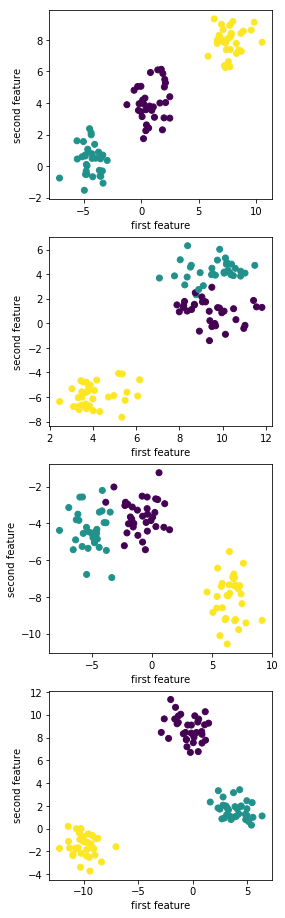

In [57]:
f, axarr = plt.subplots(4, 1, figsize=(4, 16))
data = {}
for i, ax in enumerate(axarr):
    X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=3+i**5)
    data[i] = [X, y]
    ax.scatter(X[:, 0], X[:, 1], c=y)
    ax.set_xlabel('first feature')
    ax.set_ylabel('second feature')

In [58]:
ooc = OneVsOneClassifier(estimator=LinearSVC(random_state=32), n_jobs=3)
orc = OneVsRestClassifier(estimator=LinearSVC(random_state=32), n_jobs=3)

In [12]:
ooc.fit(data[0][0], data[0][1])

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=32, tol=0.0001,
     verbose=0),
          n_jobs=3)

:(

# Кластеризация

В следующем блоке мы рассмотрим задачу кластеризации.

Для начала предлагается проанализировать поведение различных метрик. Сложно дать четкое определение, что такое хорошая кластеризация, однако можно сформулировать некоторые ее признаки:
 - объекты внутри кластера должны быть похожи друг на друга,
 - похожие объекты должны попадать в один кластер (этот пункт не следует из предыдущего!),
 - в случае, когда нам известны истинные метки классов, метрика не должна учитывать абсолютные значения меток объектов, полученных из кластеризации.

Вам предлагается сравнить 4 различных метрики:
 - [Homogeneity, Completeness и V-measure](http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure)
 - [Adjusted Rand index](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) 
 
Для выполнения задания используйте датасет, составленный из рукописных "картинок" цифр.

In [9]:
digits, labels = sklearn_shuffle(*load_digits(return_X_y=True))

В `labels` собраны названия цифр, в `digits` - их векторное представление:

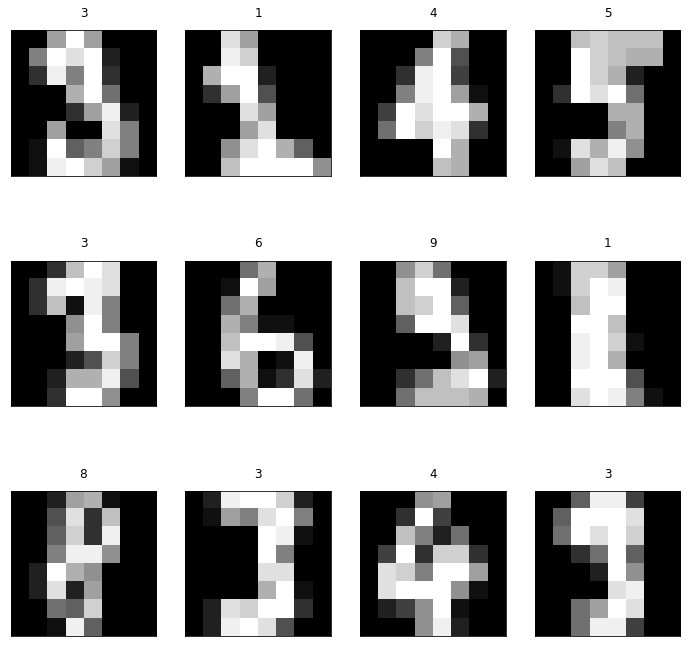

In [10]:
f, axarr = plt.subplots(3, 4, figsize=(12, 12))
plt.gray()
for ax, digit, label in zip(axarr.flatten(), digits, labels):
    ax.matshow(digit.reshape(8, 8))
    ax.tick_params(top='off', labeltop='off', left='off', labelleft='off', bottom='off')
    ax.set_title(label)

**(4 балла)** Кластеризуйте изображения при помощи алгоритма [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 
* Поcтройте графики зависимости значений метрик от числа кластеров (рекомендуется рассмотреть от 2 до 20 кластеров). Если графики получаются зашумленным, запустите алгоритм несколько раз из разных случайных положений центроидов и усредните результат.
* Визуализируйте изображения, соответствующие центроидам лучшей кластеризации. Что представляют собой эти изображения? 
* Визуализируйте несколько изображений, которые были отнесены к неправильному кластеру в случае лучшей кластеризации. Как вы думаете, почему они были неправильно кластеризованы?

In [18]:
homogeneities = []
completenesses = [] 
v_measures = []
adjusted_rand_indexes = []
models = []
for n_clusters in np.arange(2,20):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = model.fit_predict(digits)
    models.append(model)
    homogeneities.append(metrics.homogeneity_score(labels, y_pred))
    completenesses.append(metrics.completeness_score(labels, y_pred))
    v_measures.append(metrics.v_measure_score(labels, y_pred))
    adjusted_rand_indexes.append(metrics.adjusted_rand_score(labels, y_pred))

In [19]:
print(np.argmax(v_measures), np.argmax(homogeneities), np.argmax(completenesses), np.argmax(adjusted_rand_indexes))

13 17 0 9


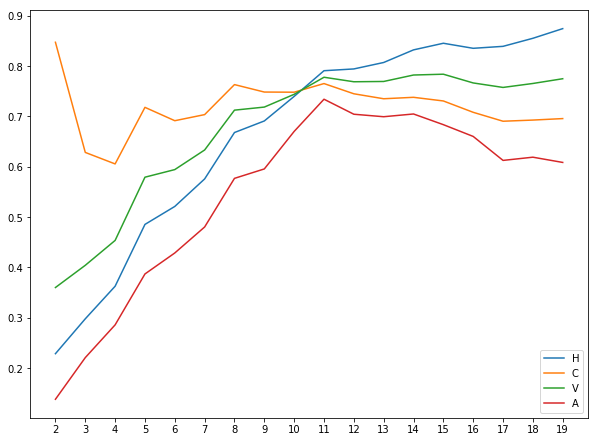

In [20]:
plt.figure(figsize=(10,7.5))
pd.Series(data=homogeneities, index=np.arange(2,20)).plot(xticks=np.arange(2,20));
pd.Series(data=completenesses, index=np.arange(2,20)).plot(xticks=np.arange(2,20));
pd.Series(data=v_measures, index=np.arange(2,20)).plot(xticks=np.arange(2,20));
pd.Series(data=adjusted_rand_indexes, index=np.arange(2,20)).plot(xticks=np.arange(2,20));
plt.legend('HCVA');

Лучшей кластеризацией назовем ту, у которой наибольшее значение Adjusted Rand Index'а. Это модель с 11 кластерами. 

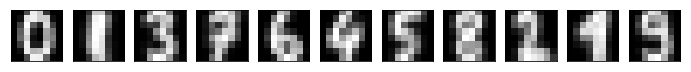

In [21]:
f, axarr = plt.subplots(1, 11, figsize=(12, 12))
plt.gray()
for ax, digit in zip(axarr.flatten(), models[9].cluster_centers_):
    ax.matshow(digit.reshape(8, 8))
    ax.tick_params(top='off', labeltop='off', left='off', labelleft='off', bottom='off')

Видим, что в центроиды попали все цифры, причем единичка - в двух вариантах написания (одним штрихом или двумя).

Наши данные имеют относительно высокую размерность - 64. Попробуем уменьшить размерность и попробовать другие алгоритмы кластеризации.

**(1 балл)** Для наглядности попробуем уложить наши данные в двухмерное пространство. Примените [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) и [tSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) к имеющися данным и визуалируйте полученный результат. Чем отличаются результаты этих двух подходов?

In [11]:
pca = PCA(n_components=2, random_state=32)
two_comp_digits = pca.fit_transform(digits)

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


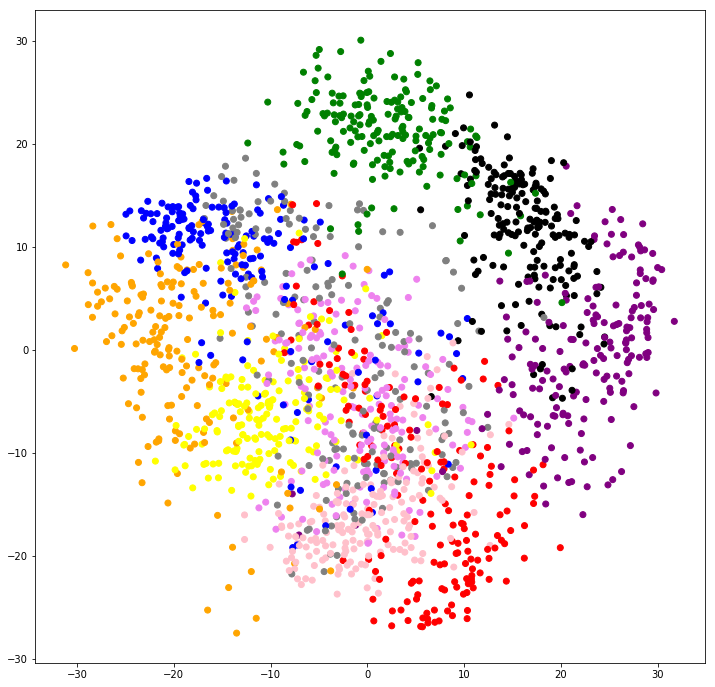

In [9]:
plt.figure(figsize=(12,12));
plt.scatter(two_comp_digits[:, 0], two_comp_digits[:, 1], 
            c=pd.Series(labels).map({0: 'green', 1: 'red', 2: 'yellow', 3: 'orange', 4: 'purple', 
                   5: 'grey', 6: 'black', 7: 'pink', 8: 'violet', 9: 'blue'}));

Глазом выделяются некоторые облака цифр, однако они сильно размазаны и перекрываются между собой. Низкое качество ожидалось, т.к. РСА предполагает линейную связь между признаками. 

In [12]:
tsne = TSNE()
tsne_representation = tsne.fit_transform(digits)

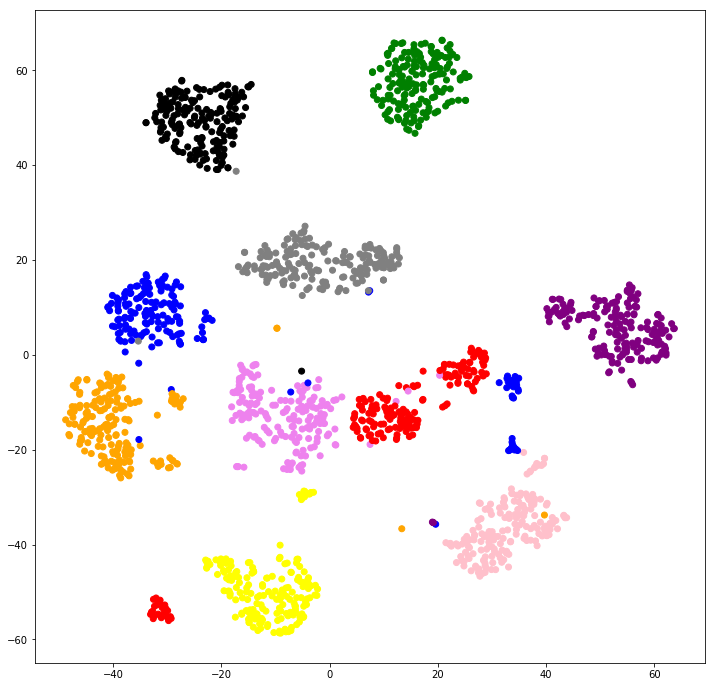

In [71]:
plt.figure(figsize=(12,12));
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=pd.Series(labels).map({0: 'green', 1: 'red', 2: 'yellow', 3: 'orange', 4: 'purple', 
                   5: 'grey', 6: 'black', 7: 'pink', 8: 'violet', 9: 'blue'}));

Качество очень хорошее. t-SNE выучил многообразия (manifold), в которых лежат наши цифры.  
Интересно. Мы видим, что единички разбило на два кластера: видимо, это единички, написанные одним штрихом и двумя штрихами. Также есть коряво написанные узкие вертикальные девятки, которые похожи на единички или семерки.

**(до 7 баллов)** К данным уменьшенной размерности примените алгоритмы кластеризации [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [DBSCAN](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), [AffinityPropagation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html) и [MeanShift](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html). Подбор параметров - на ваше усмотрение. Для каких-то методов можно даже не делать перебор или ограничиться небольшой сеткой, главное - аргументировать, почему в этом случае это уместно. Метрику выберите на свою усмотрение, пояснив свой выбор.

Визуалируйте результат кластеризации (с лучшими параметрами) на каждом из способов уменьшения размерности.

Как вы считаете, помогло ли уменьшение размерности в данном датасете? Улучшено ли качество в сравнении с KMeans на полных данных? Сравните алгоритмы кластеризации: в чем преимущества и недостатки каждого из них?

In [13]:
def clust_score(y_true, y_pred):
    return metrics.adjusted_rand_score(y_true, y_pred)

scorer = metrics.make_scorer(clust_score)

In [75]:
def visualize_clust(y_pred_pca, y_pred_tsne):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))
    ax1.scatter(two_comp_digits[:, 0], two_comp_digits[:, 1], 
            c=y_pred_pca, edgecolors='k');
    ax1.set_title('PCA');
    ax2.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=y_pred_tsne, edgecolors='k'); 
    ax2.set_title('t-SNE');

In [14]:
params_kmeans = {'n_clusters': np.arange(5,15),
                 'init': ['k-means++', 'random'],
                 'n_init': [2, 10, 100]}
grid_km = GridSearchCV(KMeans(random_state=42), params_kmeans, n_jobs=4, scoring=scorer)

grid_km.fit(two_comp_digits, labels)
print('PCA \nThe best hyperparameters for KMeans are:', grid_km.best_params_, 
      'score (ARI) is:', grid_km.best_score_)

grid_km.fit(tsne_representation, labels)
print('\nt-SNE representation \nThe best hyperparameters for KMeans are:', grid_km.best_params_, 
      'score (ARI) is:', grid_km.best_score_)

PCA 
The best hyperparameters for KMeans are: {'n_init': 10, 'init': 'random', 'n_clusters': 10} score (ARI) is: 0.395133203837

t-SNE representation 
The best hyperparameters for KMeans are: {'n_init': 10, 'init': 'k-means++', 'n_clusters': 11} score (ARI) is: 0.884731340127


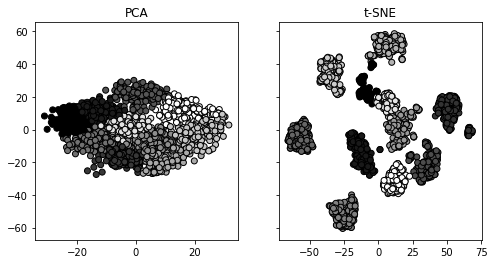

In [76]:
y_pred_pca = KMeans(n_init=10, init='random', n_clusters=10, random_state=42).fit_predict(two_comp_digits)
y_pred_tsne = KMeans(n_init=10, init='k-means++', n_clusters=11, random_state=42).fit_predict(tsne_representation)
visualize_clust(y_pred_pca, y_pred_tsne)

In [15]:
params_mean_shift = {'bandwidth': [0.1, 1, 10, 100]}
grid_ms = GridSearchCV(cluster.MeanShift(n_jobs=4), params_mean_shift, n_jobs=1, scoring=scorer)

grid_ms.fit(two_comp_digits, labels)
print('PCA \nThe best hyperparameters for MeanShift are:', grid_ms.best_params_, 
      'score (ARI) is:', grid_ms.best_score_)

grid_ms.fit(tsne_representation, labels)
print('\nt-SNE representation \nThe best hyperparameters for MeanShift are:', grid_ms.best_params_, 
      'score (ARI) is:', grid_ms.best_score_)

PCA 
The best hyperparameters for MeanShift are: {'bandwidth': 10} score (ARI) is: 0.244371933863

t-SNE representation 
The best hyperparameters for MeanShift are: {'bandwidth': 10} score (ARI) is: 0.873774716376


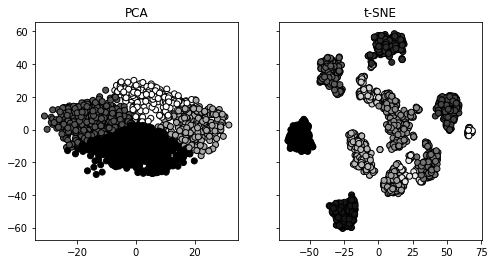

In [77]:
y_pred_pca = cluster.MeanShift(bandwidth=10, n_jobs=4).fit_predict(two_comp_digits)
y_pred_tsne = cluster.MeanShift(bandwidth=10, n_jobs=4).fit_predict(tsne_representation)
visualize_clust(y_pred_pca, y_pred_tsne)

In [106]:
params_aff = {'damping': np.linspace(0.5, 0.9, 10)}

grid_aff = GridSearchCV(cluster.AffinityPropagation(), params_aff, n_jobs=4, scoring=scorer)

grid_aff.fit(two_comp_digits, labels)
print('PCA \nThe best hyperparameters for AffinityPropagation are:', grid_aff.best_params_, 
      'score (ARI) is:', grid_aff.best_score_)

grid_aff.fit(tsne_representation, labels)
print('\nt-SNE representation \nThe best hyperparameters for AffinityPropagation are:', grid_aff.best_params_, 
      'score (ARI) is:', grid_aff.best_score_)

PCA 
The best hyperparameters for AffinityPropagation are: {'damping': 0.67777777777777781} score (ARI) is: 0.246393134889

t-SNE representation 
The best hyperparameters for AffinityPropagation are: {'damping': 0.90000000000000002} score (ARI) is: 0.750363885171


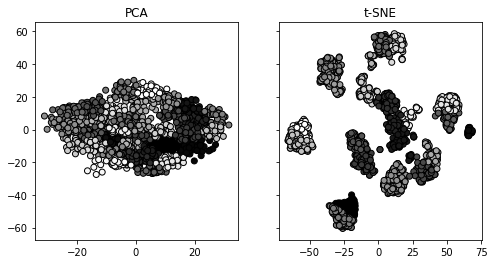

In [108]:
y_pred_pca = cluster.AffinityPropagation(damping=0.67777777777777781).fit_predict(two_comp_digits)
y_pred_tsne = cluster.AffinityPropagation(damping=0.90000000000000002).fit_predict(tsne_representation)
visualize_clust(y_pred_pca, y_pred_tsne)

In [61]:
hyperparams_arr = []
dbscan_scores_pca = []
dbscan_scores_tsne = []

epsilones = np.linspace(0.1, 10, 20)
min_samples_arr = np.arange(1, 50, 3)

for eps in epsilones:
    for min_samples in min_samples_arr:
        hyperparams_arr.append((eps, min_samples))
        dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples, n_jobs=4)
            
        score = clust_score(labels, dbscan.fit_predict(two_comp_digits))
        dbscan_scores_pca.append(score)
            
        score = clust_score(labels, dbscan.fit_predict(tsne_representation))
        dbscan_scores_tsne.append(score)

print('PCA \n The best hyperparameters (eps, min_samples) for DBSCAN are:', hyperparams_arr[np.argmax(dbscan_scores_pca)], 
      'score (ARI) is:', np.max(dbscan_scores_pca))

print('\nt-SNE \n The best hyperparameters (eps, min_samples) for DBSCAN are:', hyperparams_arr[np.argmax(dbscan_scores_tsne)], 
      'score (ARI) is:', np.max(dbscan_scores_tsne))

PCA 
 The best hyperparameters (eps, min_samples) for DBSCAN are: (3.7473684210526321, 49) score (ARI) is: 0.203272734055

t-SNE 
 The best hyperparameters (eps, min_samples) for DBSCAN are: (3.2263157894736847, 10) score (ARI) is: 0.883888899315


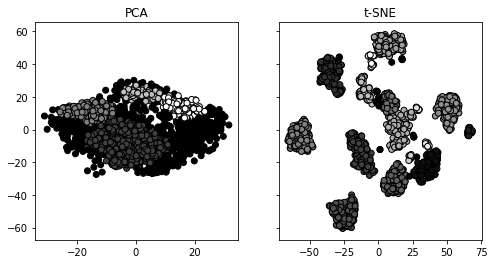

In [78]:
y_pred_pca = cluster.DBSCAN(eps=3.7473684210526321, min_samples=49, n_jobs=4).fit_predict(two_comp_digits)
y_pred_tsne = cluster.DBSCAN(eps=3.2263157894736847, min_samples=10, n_jobs=4).fit_predict(tsne_representation)
visualize_clust(y_pred_pca, y_pred_tsne)

DBSCAN отказался кластеризовать достаточно большое число объектов из РСА-представления данных. 

In [73]:
hyperparams_arr = []
agg_scores_pca = []
agg_scores_tsne = []

n_clusters_arr = np.arange(5, 15)
link = ['ward', 'complete', 'average']

for n_clusters in n_clusters_arr:
    for linkage in link:
        hyperparams_arr.append((n_clusters, linkage))
        agg = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            
        score = clust_score(labels, agg.fit_predict(two_comp_digits))
        agg_scores_pca.append(score)
            
        score = clust_score(labels, agg.fit_predict(tsne_representation))
        agg_scores_tsne.append(score)

print('PCA \n The best hyperparameters (n_clusters, linkage) for AgglomerativeClustering are:', hyperparams_arr[np.argmax(agg_scores_pca)], 
      'score (ARI) is:', np.max(agg_scores_pca))

print('\nt-SNE \n The best hyperparameters (n_clusters, linkage) for AgglomerativeClustering are:', hyperparams_arr[np.argmax(agg_scores_tsne)], 
      'score (ARI) is:', np.max(agg_scores_tsne))

PCA 
 The best hyperparameters (n_clusters, linkage) for AgglomerativeClustering are: (13, 'average') score (ARI) is: 0.37821447215

t-SNE 
 The best hyperparameters (n_clusters, linkage) for AgglomerativeClustering are: (11, 'average') score (ARI) is: 0.901685807083


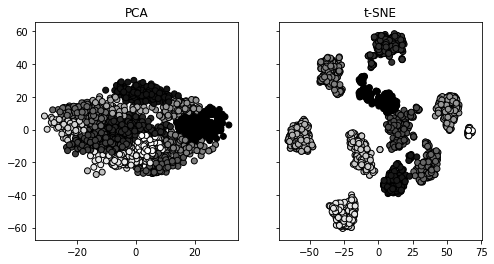

In [79]:
y_pred_pca = cluster.AgglomerativeClustering(n_clusters=13, linkage='average').fit_predict(two_comp_digits)
y_pred_tsne = cluster.AgglomerativeClustering(n_clusters=11, linkage='average').fit_predict(tsne_representation)
visualize_clust(y_pred_pca, y_pred_tsne)

# Рассуждения

Понижение размерности при помощи t-SNE улучшило картину для всех типов кластеризации. Adjusted Rand Index достиг значения 0.9+ для метода AgglomerativeClustering. Понижение размерности при помощи РСА сильно ухудшило качество кластеризации по сравнению с исходными данными. 

AffinityPropagation, MeanShift и DBSCAN хороши тем, что им не надо задавать априорное количество кластеров, а DBSCAN еще и может отказываться от кластеризации определенных объектов. Однако такие алгоритмы надо достаточно тонко тюнить по другим гиперпараметрам. AffinityPropagation показал себя ужасно медленным алгоритмом, так и не давшим хорошее качество. 

Старый-добрый KMeans на определенных датасетах может очень сильно зависеть от random_state, однако здесь он показал себя вполне хорошо. Его также можно делать по мини-батчам, что подходит для больших данных (с плотностными методами не так хорошо в этом плане). 

# Исследовательская задача

**(до 15 баллов)** В этом задании не будет четких инструкций по выполнению. Вам будет дан массив текстов, ваша задача - выделить в этих текстах тематики. Также вам будет предложен некоторый "скелет" решения.

Данные будут представлены в виде матрицы [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF). Прочитайте, в чем ее смысл.

Загрузим тексты:

In [80]:
with open('texts.pickle', 'rb') as f:
    texts = pickle.load(f)

Примеры записей:

In [81]:
for text in sample(texts, 3):
    print(text)
    print(80 * '=')

You can't make a Citizens arrest on anything but a felony.
.
  


: I have seen these numbers quoted before, and I have seen very specific
: refutation of them quoted as well.  If someone will be so kind as to
: email the relevant information, I will write a letter to the editor of
: the Co. Daily (which might get published) and send a copy to USN&WR as
: well.

Thanks to all who responded.  The letter has been written (making liberal
use of info provided by various net.folks) and handed to the paper.  I'll
post if it gets into the paper!

--Dan

--
  DoD #202 / loki@acca.nmsu.edu / liberty or death / taylordf@ucsu.colorado.edu 
                 Send me something even YOU can't read...
-----BEGIN PGP PUBLIC KEY BLOCK-----
Version: 2.1
I've just read Richard Langley's latest "Navstar GPS Constellation Status".

It states that the latest satellite was placed in Orbit Plane Position C-3.
There is already one satellite in that position. I know that it's almost
ten years since that satellit

В текстах могут присутствовать подписи авторов, смайлики, сленговые слова. Часть текстов могут быть пустые или содержать мало слов.

Ниже построена матрица TF-IFD для этого корпуса текстов. В данной реализации оставлены только слова длины больше 3 и не рассматриваются стоп-слова из английского языка (например, "and", "the", "by"). Вы можете воспользоваться данной реализацией или использовать свою. Более подробно об инструменте для создания TF-IDF матрицы можно почитать [тут](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

**Важно!** Матрица хранится в sparse виде, работа с ней в dense форме может быть вычислительно сложна.

In [82]:
vectorizer = TfidfVectorizer(token_pattern=u'[a-z][a-z][a-z]+', stop_words='english')
tf_idf = vectorizer.fit_transform(texts)

In [83]:
type(tf_idf), tf_idf.shape

(scipy.sparse.csr.csr_matrix, (2334, 23431))

Вы можете получить список слов, соответствующих колонкам матрицы, следующей командой:

In [84]:
words = vectorizer.get_feature_names()
print(sample(words, 10))

['published', 'antifreeze', 'rtgr', 'opinons', 'reduces', 'mobile', 'shuttles', 'auggggg', 'tends', 'airframe']


In [86]:
svd = TruncatedSVD(n_components=10, random_state=36)
features = svd.fit_transform(tf_idf)
S = svd.singular_values_
Vt = svd.components_

В этом задании вы попробуете представить сообщения векторами небольшой размерности. Идея вот в чём. Изначально каждое сообщение у нас представлена огромным количеством признаков: tf-idf индексами всех слов. SVD позволяет значительную часть информации собрать в нескольких новых признаках; тем самым, сообщения будут представлены достаточно короткими векторами.

Задайте число компонент равным 10 и визуализуйте сообщения в пространстве первых трёх новых признаков. Какие геометрические особенности датасета становятся видны? Стоят ли за этим какие-то содержательные закономерности?

:(

Попробуйте рассмотреть несколько новых признаков и попытайтесь понять, какие из исходных признаков (то есть какие слова) вносят наибольший вклад. Для каждой компоненты это можно определить, взяв соотвествующий вектор в матрице V и посмотрев, на каких позициях стоят наибольшие и наименьшие значения этого вектора. Выпишите эти слова (соответствующие наибольшим значениям vs соответствующие наименьшим значениям). Как вы думаете, какие компоненты стоит выбрать для выделения тематик?

Сделайте выводы о представленных в текстах тематиках.

:(

Далее, попробуйте кластеризовать (подумайте, какой кластеризатор тут наиболее уместен) тексты в пространстве новых признаков. На какие группы происходит разделение? Приведите примеры текстов из каждой группы. Обратите внимание, что из-за того, что большинство текстов не содержат содержательных фраз, хорошо кластеризуется лишь меньшая часть сообщений.

In [117]:
model = cluster.AgglomerativeClustering(n_clusters=20)
predictions = model.fit_predict(features)

In [111]:
tsne_repr = TSNE().fit_transform(features)

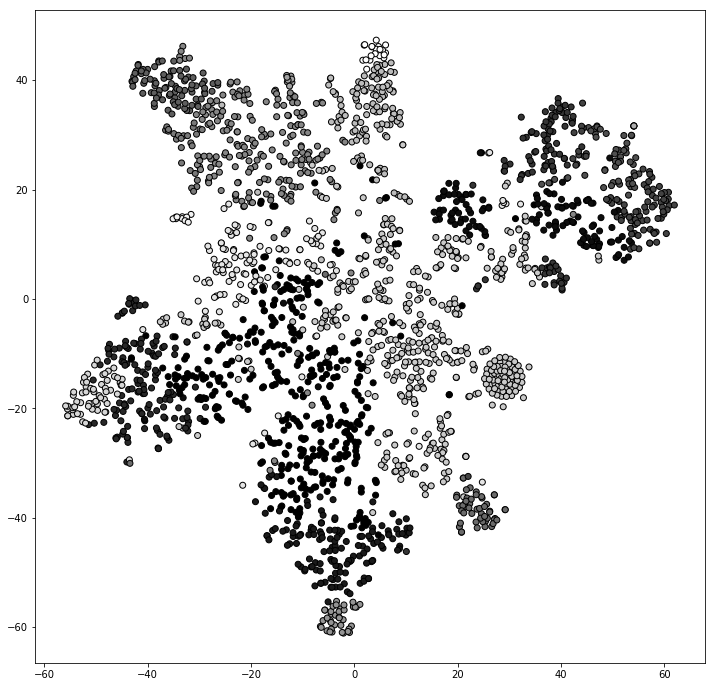

In [118]:
plt.figure(figsize=(12,12));
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
            c=predictions, edgecolors='k');